In [1]:
import hkvfewspy as hkv
from datetime import datetime
%matplotlib inline

In [2]:
hkv.__version__

'0.5.0'

In [3]:
# set client
pi = hkv.pi
pi.setClient(wsdl='http://localhost:8081/FewsPiService/fewspiservice?wsdl') 

In [4]:
# get filters
filters = pi.getFilters()
filters.f_trend_1

{'id': 'f_trend.1', 'name': 'Cut-data', 'description': ''}

In [5]:
# get parameters
parameters = pi.getParameters(filters.f_trend_1['id'])
parameters.m3_minDepth_cut['id']

'm3.minDepth.cut'

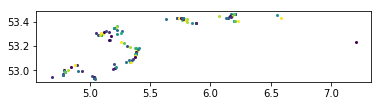

In [6]:
# get locations
locations = pi.getLocations(setFormat='gdf')
locations.plot()

In [7]:
locations.locationId.iloc[0:3].tolist()

['bv.1.7.1.1', 'bv.1.7.1.1.1.1', 'bv.1.7.1.1.1.2']

In [8]:
query = pi.setQueryParameters(prefill_defaults=True)

In [9]:
query.parameterIds(['m3.minDepth.cut'])
query.moduleInstanceIds(['pr.minDepth.cutfill.volopp.setfill'])
query.locationIds(['bv.1.7.2.3.2'])
query.startTime(datetime(2018,1,1))
query.endTime(datetime(2018,7,1))
query.clientTimeZone('Europe/Amsterdam')

In [10]:
query.query

{'convertDatum': False,
 'forecastSearchCount': 0,
 'importFromExternalDataSource': False,
 'omitMissing': False,
 'onlyHeaders': False,
 'showEnsembleMemberIds': False,
 'showStatistics': False,
 'showThresholds': False,
 'useDisplayUnits': True,
 'version': '1.22',
 'parameterIds': ['m3.minDepth.cut'],
 'moduleInstanceIds': ['pr.minDepth.cutfill.volopp.setfill'],
 'locationIds': ['bv.1.7.2.3.2'],
 'startTime': datetime.datetime(2018, 1, 1, 0, 0),
 'endTime': datetime.datetime(2018, 7, 1, 0, 0),
 'clientTimeZone': 'Europe/Amsterdam'}

In [11]:
df, entry = pi.getTimeSeries(queryParameters=query, setFormat='df')

In [12]:
entry

'pr.minDepth.cutfill.volopp.setfill|q.all|m3.minDepth.cut|bv.1.7.2.3.2|m3'

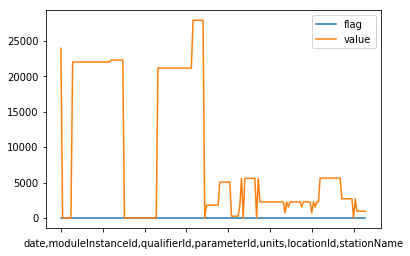

In [13]:
df.plot()

In [14]:
df.head()

,,,,,,,flag,value
date,moduleInstanceId,qualifierId,parameterId,units,locationId,stationName,,
2018-01-01 00:00:00+01:00,pr.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut,m3,bv.1.7.2.3.2,Blauwe Slenk,0.0,23956.96
2018-01-02 00:00:00+01:00,pr.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut,m3,bv.1.7.2.3.2,Blauwe Slenk,0.0,0.00
2018-01-03 00:00:00+01:00,pr.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut,m3,bv.1.7.2.3.2,Blauwe Slenk,0.0,0.00
2018-01-04 00:00:00+01:00,pr.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut,m3,bv.1.7.2.3.2,Blauwe Slenk,0.0,0.00
2018-01-05 00:00:00+01:00,pr.minDepth.cutfill.volopp.setfill,q.all,m3.minDepth.cut,m3,bv.1.7.2.3.2,Blauwe Slenk,0.0,0.00
